In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

trials = pd.read_csv('https://raw.githubusercontent.com/Dpf050/Programming-Project/main/DataSets/trials.csv')

Number of Trials by Country

C:\Users\Diogo\AppData\Local\Temp\ipykernel_7820\3892702632.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['country']):


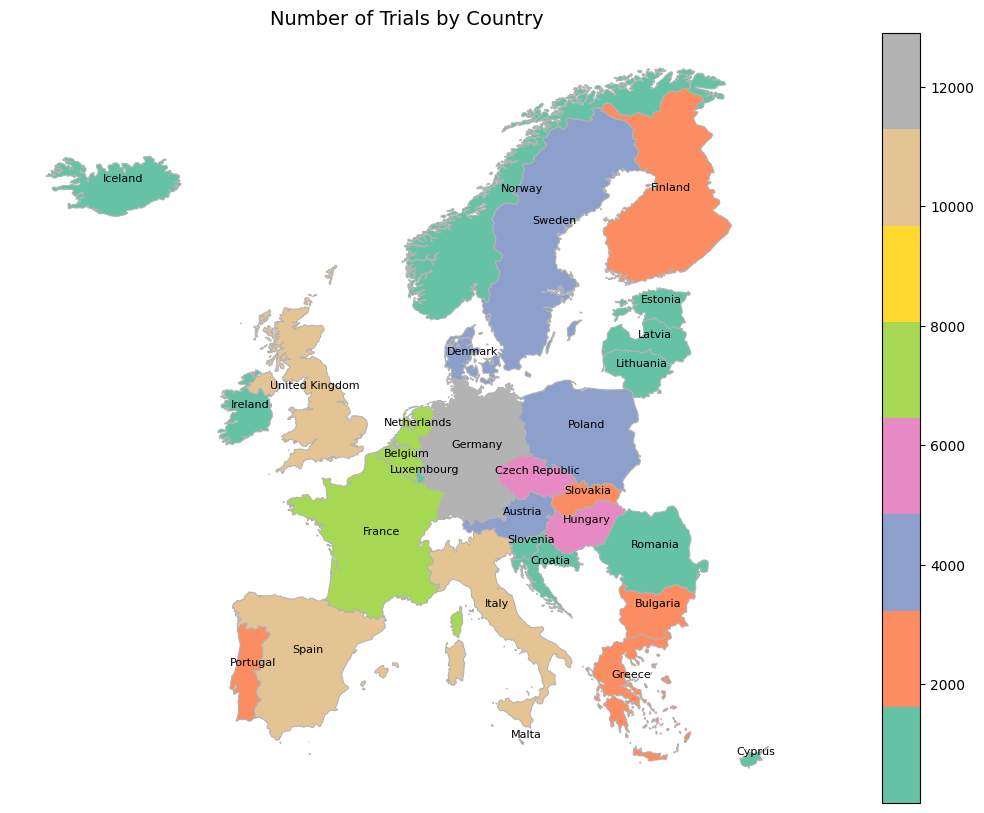

In [2]:
#Geting data ready
geo = pd.DataFrame()
geo= trials.country.value_counts().to_frame().reset_index()
geo.columns = ['country', 'count']
geo['country'] = geo.country.str.strip()

#Getting Europe map
europe = gpd.read_file('https://raw.githubusercontent.com/leakyMirror/map-of-europe/master/GeoJSON/europe.geojson')[['NAME', 'geometry']]

#Are all my countries with the same name in the map df?
europe_countries= list(europe.NAME.values)
my_countries = list(geo.country.values)
countries_unformated = set(my_countries)-set(europe_countries)

# Need to change  - {'Czechia', 'UK'}
geo.loc[geo.country == 'Czechia', 'country'] = 'Czech Republic'
geo.loc[geo.country == 'UK', 'country'] = 'United Kingdom'

#Merging Datasets
europe_map = europe.merge(geo, left_on='NAME', right_on='country', how='left')

#Plotting
fig, ax = plt.subplots(1, figsize=(20, 10))
graph = europe_map.plot(column='count', cmap='Set2', linewidth=0.8, ax=ax, edgecolor='0.7', legend = True)
ax.axis('off')
for x, y, label in zip(europe_map.centroid.x, europe_map.centroid.y, europe_map['country']):
    if not pd.isnull(label):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=8, ha='center')
graph.set_title('Number of Trials by Country',fontsize=14)
plt.show()

Number of Triasl over the years...

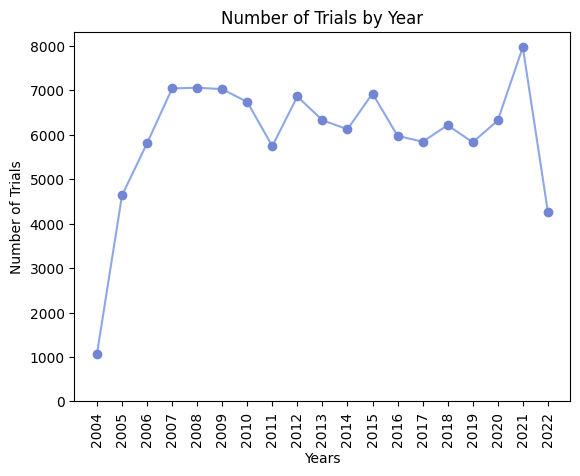

In [3]:
year_num_trials = trials.start_date.str.split('-').str[0].value_counts().sort_index(ascending=True)[:-1]


sns.lineplot(x=year_num_trials.index, y=year_num_trials.values,color='#8EA7E9')
plt.scatter(year_num_trials.index, year_num_trials.values, color='#7286D3', zorder=2)
plt.xticks(rotation=90)
plt.title('Number of Trials by Year')
plt.ylabel('Number of Trials')
plt.xlabel('Years')
plt.ylim(bottom=0)
plt.show()


Public or Private Funding ?

In [4]:
sponsor_type  = round(trials.sponsor_type.value_counts() /len(trials) * 100,2)
sponsor_type

Commercial        78.52
Non-Commercial    21.11
Name: sponsor_type, dtype: float64

Therapeutic Areas %

In [5]:
trials.topic_category.fillna('Not possible to specify', inplace=True)

categories_percnt = round(trials.topic_category.value_counts() / len(trials) * 100,2)
categories_percnt

Diseases                                                           61.59
Not possible to specify                                            31.99
Body processes                                                      3.26
Psychiatry and Psychology                                           1.56
Analytical, Diagnostic and Therapeutic Techniques and Equipment     1.54
Health Care                                                         0.06
Name: topic_category, dtype: float64

Sub Therapeutic Areas - more and less studied

In [6]:
trials.topic_sub_category.fillna('Not possible to specify', inplace=True)

sub_categories_percnt =  round(trials.topic_sub_category.value_counts() / len(trials) * 100,2)

print('Subcategories MORE Studied\n')
print(sub_categories_percnt[:6])
print('\nSubcategories LESS Studied\n')
sub_categories_percnt[-5:]


Subcategories MORE Studied

Not possible to specify       31.99
Cancer                        19.21
Nervous System Diseases        5.79
Cardiovascular Diseases        4.38
Respiratory Tract Diseases     3.84
Immune System Diseases         3.82
Name: topic_sub_category, dtype: float64

Subcategories LESS Studied



Integumentary System Physiological Phenomena      0.01
Equipment and Supplies                            0.01
Health Services Administration                    0.00
Health Care Facilities, Manpower, and Services    0.00
Health Care Economics and Organizations           0.00
Name: topic_sub_category, dtype: float64

More comon Trial Scope

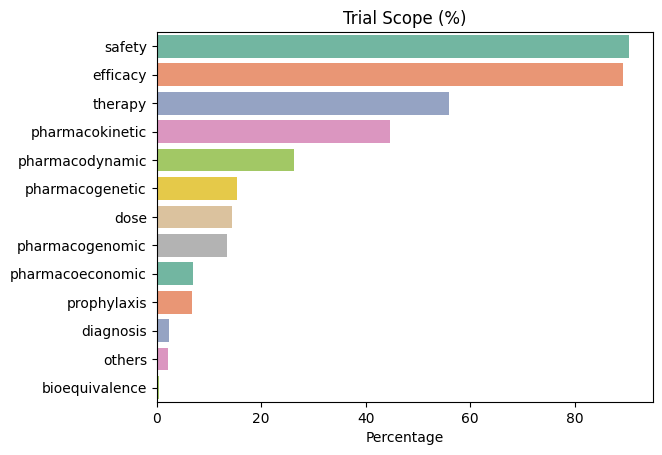

In [7]:
trials.scope.value_counts()

cols = trials.loc[:, trials.columns.str.contains('_scope')]
category_percentage = {}

for col in cols.columns:
    category = col.split('_')[0]
    percentage = round((cols[col] == 'Yes').sum() * 100 / len(trials),2)
    category_percentage[category] = percentage

df = pd.DataFrame(category_percentage.items(), columns=['Scope', 'Percentage'])
df = df.sort_values('Percentage', ascending=False)

sns.barplot(data=df, x='Percentage', y='Scope',palette='Set2')
plt.title('Trial Scope (%)')
plt.ylabel('')
plt.show()

% of Trials by Phase

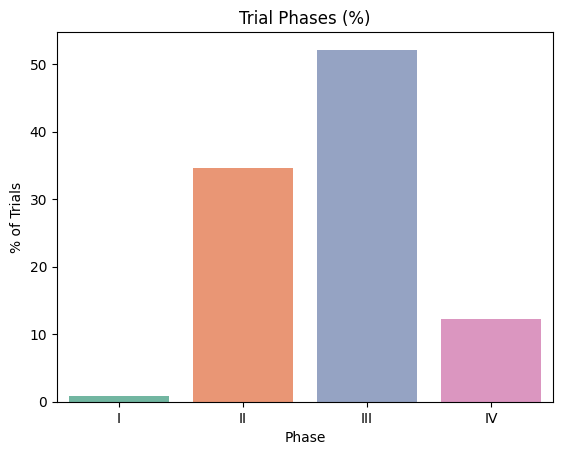

In [8]:
phase_perct = round(trials.phase.value_counts() / len(trials) *100,2)


sns.barplot(x= phase_perct.index, y=phase_perct.values, palette='Set2')
plt.gca().set_xticklabels(['I', 'II', 'III', 'IV'])
plt.title('Trial Phases (%)')
plt.xlabel('Phase')
plt.ylabel('% of Trials')
plt.show()

Age Groups Studied

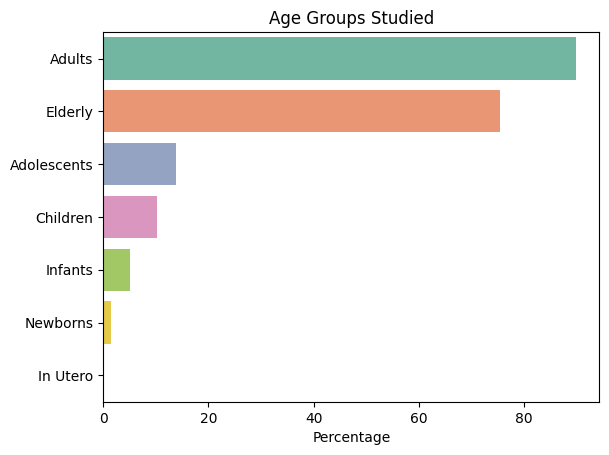

In [25]:
trials.age.value_counts()[:5]

cols = trials.loc[:, trials.columns.str.contains('_age')]
category_percentage = {}

for col in cols.columns:
    category = col.split('_')[0]
    percentage = round((cols[col] == 'Yes').sum() * 100 / len(trials),2)
    category_percentage[category] = percentage

df = pd.DataFrame(category_percentage.items(), columns=['Age', 'Percentage'])
df = df.sort_values('Percentage', ascending=False)

sns.barplot(data=df, x='Percentage', y='Age',palette='Set2')
plt.gca().set_yticklabels(['Adults', 'Elderly', 'Adolescents', 'Children', 'Infants', 'Newborns', 'In Utero'])
plt.title('Age Groups Studied')
plt.ylabel('')
plt.show()
